Imporing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

Reading csv file using read_csv

In [4]:
crime_data=pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

Checking null values

In [5]:
crime_data.loc[:,crime_data.isna().any()]

,Case Number,Location Description,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,HZ250496,APARTMENT,10.0,24.0,29.0,1154907.0,1893681.0,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,HZ250409,RESIDENCE,3.0,20.0,42.0,1183066.0,1864330.0,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,HZ250503,STREET,15.0,37.0,25.0,1140789.0,1904819.0,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,HZ250424,SIDEWALK,15.0,28.0,25.0,1143223.0,1901475.0,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,HZ250455,RESIDENCE,15.0,28.0,25.0,1139890.0,1901675.0,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,HZ250447,STREET,6.0,8.0,44.0,1183336.0,1850642.0,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,HZ250489,CHA HALLWAY/STAIRWELL/ELEVATOR,1.0,3.0,35.0,1176730.0,1886544.0,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,HZ250514,RESIDENCE PORCH/HALLWAY,2.0,3.0,38.0,1178514.0,1874573.0,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,HZ250523,SIDEWALK,24.0,40.0,1.0,1165696.0,1942616.0,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,HZ250667,STREET,7.0,17.0,67.0,1166876.0,1858796.0,41.768097,-87.663879,"(41.768096835, -87.663878589)"


Dropping null values if any

In [6]:
crime_data = crime_data.dropna()
crime_data = crime_data.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

Cleaned Data

In [7]:
crime_data

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,29.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,42.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,25.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,25.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,05/03/2016 10:35:00 PM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,44.0,2016,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,05/03/2016 10:30:00 PM,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,35.0,2016,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,05/03/2016 09:30:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,38.0,2016,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,1.0,2016,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,05/03/2016 10:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,67.0,2016,41.768097,-87.663879,"(41.768096835, -87.663878589)"


# Crime count by location

We can see most of the crime happens on street

In [8]:
pd.value_counts(crime_data['Location Description'])

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
RESIDENCE-GARAGE                   25256
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23996
DEPARTMENT STORE                   20360
GROCERY FOOD STORE                 15742
GAS STATION                        15019
PARK PROPERTY                      12107
BAR OR TAVERN                       9603
COMMERCIAL / BUSINESS OFFICE        7412
CTA PLATFORM                        7173
CTA TRAIN                           6968
CONVENIENCE STORE                   6544
VACANT LOT/LAND                     6507
SCHOOL, PUBLIC, 

# Primary type of crime

In [9]:
df=pd.value_counts(crime_data['Primary Type'])

In [10]:
df

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [11]:
Location_df=pd.DataFrame({"Counts" : crime_data['Location Description'].value_counts(), "Location" : crime_data["Location Description"].value_counts().index})

In [12]:
Location_df

,Counts,Location
STREET,325084,STREET
RESIDENCE,223854,RESIDENCE
APARTMENT,179444,APARTMENT
SIDEWALK,158478,SIDEWALK
OTHER,53474,OTHER
PARKING LOT/GARAGE(NON.RESID.),40907,PARKING LOT/GARAGE(NON.RESID.)
ALLEY,31239,ALLEY
RESIDENTIAL YARD (FRONT/BACK),30209,RESIDENTIAL YARD (FRONT/BACK)
SMALL RETAIL STORE,28209,SMALL RETAIL STORE
"SCHOOL, PUBLIC, BUILDING",25474,"SCHOOL, PUBLIC, BUILDING"


<Figure size 1080x720 with 0 Axes>

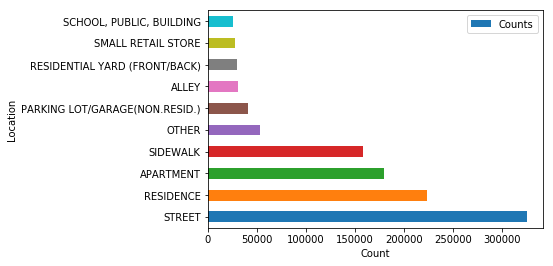

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize = (15, 10))
Location_df.iloc[:10].plot(x='Location',y='Counts',kind='barh')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()
plt.savefig('Highest crime count.png')

# Plotting crime data on map

In [14]:
locations = crime_data.groupby('Community Area').first()

In [15]:
locations

,Date,Primary Type,Description,Location Description,Arrest,Year,Latitude,Longitude,Location
Community Area,,,,,,,,,
0.0,02/19/2012 06:54:00 PM,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,2012,41.799090,-87.790549,"(41.799089601, -87.790549465)"
1.0,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,2016,41.998131,-87.665814,"(41.99813061, -87.665814038)"
2.0,05/03/2016 10:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,2016,41.999731,-87.705810,"(41.99973106, -87.705809711)"
3.0,05/03/2016 09:35:00 PM,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,2016,41.972843,-87.671127,"(41.972843435, -87.671127232)"
4.0,05/04/2016 12:01:00 AM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),False,2016,41.981316,-87.695119,"(41.9813162, -87.695118674)"
5.0,05/04/2016 04:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,MEDICAL/DENTAL OFFICE,False,2016,41.961482,-87.676856,"(41.961482397, -87.676855619)"
6.0,05/03/2016 09:45:00 PM,THEFT,OVER $500,RESIDENCE PORCH/HALLWAY,False,2016,41.949986,-87.653197,"(41.949986394, -87.65319658)"
7.0,05/03/2016 06:30:00 PM,THEFT,OVER $500,RESIDENCE-GARAGE,False,2016,41.927322,-87.665810,"(41.927321839, -87.665810418)"
8.0,05/03/2016 11:11:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,2016,41.893027,-87.626751,"(41.893026751, -87.626750829)"


In [16]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [17]:
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


# Using follium to plot crime location 

In [18]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [19]:
popup_text= """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""

In [20]:
for i in range(len(new_locations)):
    lat=new_locations.iloc[i][0]
    long=new_locations.iloc[i][1]
    popup_text=popup_text.format(new_locations.index[i],new_locations.iloc[i][-1],new_locations.iloc[i][-2])
    folium.CircleMarker(location=[lat,long],popup=popup_text,fill=True).add_to(chicago_map)

In [21]:
chicago_map

In [22]:
unique_locations=pd.value_counts(crime_data['Location'])

In [23]:
unique_index=unique_locations.index

# Getting co-ordnates of the  location

In [24]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [25]:
def cordinate_extract(raw_string):
    cordinate=raw_string[1:-1].split(',')
    lat=float(cordinate[0])
    long=float(cordinate[1])
    return(lat,long)

In [26]:
CR_index['Cordinates']=CR_index['Raw_String'].apply(cordinate_extract)

In [27]:
CR_index=CR_index.drop(columns='Raw_String',axis=1)

In [28]:
CR_index.head()

,ValueCount,Cordinates
0,2093,"(41.883500187, -87.627876698)"
1,2082,"(41.754592961, -87.741528537)"
2,1338,"(41.979006297, -87.906463155)"
3,1319,"(41.897895128, -87.624096605)"
4,1122,"(41.742710224, -87.634088181)"


In [29]:
 lat = CR_index['Cordinates'].iloc[1][0]

In [30]:
crime_map=folium.Map(location=[41.883500187, -87.627876698],zoom_start=13,tiles="CartoDB dark_matter")
for i in range(500):
    lat=CR_index['Cordinates'].iloc[i][0]
    long=CR_index['Cordinates'].iloc[i][1]
    radius=CR_index['ValueCount'].iloc[i]/45
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#ff0000"
    else:
        color = "#803b00"
    
    popup_text = """Incidents : {}<br>
                    Latitude : {}<br>
                    Longitude : {}<br>"""
    popup_text = popup_text.format(CR_index['ValueCount'].iloc[i],lat,
                               long)
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)

In [31]:
crime_map

In [32]:
crime_data.head()

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,29.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,42.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,25.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,25.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [33]:
df_theft = crime_data[crime_data['Primary Type'] == 'THEFT']

In [34]:
df_theft.head()

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
12,05/03/2016 05:30:00 PM,THEFT,FROM BUILDING,OTHER,False,28.0,2016,41.877812,-87.655758,"(41.877811861, -87.655758012)"
13,05/03/2016 09:00:00 AM,THEFT,$500 AND UNDER,STREET,False,35.0,2016,41.843017,-87.617227,"(41.843016958, -87.61722727)"
14,05/03/2016 10:08:00 PM,THEFT,OVER $500,STREET,False,24.0,2016,41.910901,-87.686019,"(41.910900826, -87.686018747)"
16,05/03/2016 09:45:00 PM,THEFT,OVER $500,STREET,False,24.0,2016,41.908237,-87.678437,"(41.908237096, -87.678437417)"


# Getting count of unresolved cases

In [35]:
df_theft['Arrest'].apply(lambda x: x=='False').value_counts()

False    321950
Name: Arrest, dtype: int64

In [36]:
# Day

In [37]:
df_theft['Date']=pd.to_datetime(df_theft['Date'])

C:\Users\AKSHATA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_theft['Day']=df_theft['Date'].apply(lambda x: x.weekday())

C:\Users\AKSHATA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_theft

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location,Day
4,2016-05-03 22:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)",1
12,2016-05-03 17:30:00,THEFT,FROM BUILDING,OTHER,False,28.0,2016,41.877812,-87.655758,"(41.877811861, -87.655758012)",1
13,2016-05-03 09:00:00,THEFT,$500 AND UNDER,STREET,False,35.0,2016,41.843017,-87.617227,"(41.843016958, -87.61722727)",1
14,2016-05-03 22:08:00,THEFT,OVER $500,STREET,False,24.0,2016,41.910901,-87.686019,"(41.910900826, -87.686018747)",1
16,2016-05-03 21:45:00,THEFT,OVER $500,STREET,False,24.0,2016,41.908237,-87.678437,"(41.908237096, -87.678437417)",1
22,2016-05-03 18:30:00,THEFT,OVER $500,RESIDENCE-GARAGE,False,7.0,2016,41.927322,-87.665810,"(41.927321839, -87.665810418)",1
23,2016-05-03 21:00:00,THEFT,$500 AND UNDER,STREET,False,10.0,2016,41.995962,-87.797529,"(41.995961517, -87.797528563)",1
25,2016-05-03 07:00:00,THEFT,$500 AND UNDER,VEHICLE-COMMERCIAL,False,73.0,2016,41.721380,-87.649781,"(41.721379795, -87.649781161)",1
26,2016-05-03 20:30:00,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,7.0,2016,41.925278,-87.659368,"(41.925278177, -87.65936796)",1
32,2016-05-03 19:30:00,THEFT,$500 AND UNDER,STREET,False,23.0,2016,41.905284,-87.732616,"(41.90528413, -87.732615525)",1


In [144]:
#theft_in_day=df_theft.groupby(['Day','Description']).first()

In [145]:
theft_in_day

Date Primary Type  \
Day Description                                                         
0   $500 AND UNDER                   2016-04-25 00:30:00        THEFT   
    AGG: FINANCIAL ID THEFT          2012-01-09 09:00:00        THEFT   
    ATTEMPT FINANCIAL IDENTITY THEFT 2012-01-23 12:00:00        THEFT   
    ATTEMPT THEFT                    2016-05-09 03:01:00        THEFT   
    DELIVERY CONTAINER THEFT         2016-05-02 23:00:00        THEFT   
    FINANCIAL ID THEFT: OVER $300    2012-01-02 11:00:00        THEFT   
    FINANCIAL ID THEFT:$300 &UNDER   2012-01-09 14:40:00        THEFT   
    FROM BUILDING                    2016-05-02 08:30:00        THEFT   
    FROM COIN-OP MACHINE/DEVICE      2012-01-09 15:00:00        THEFT   
    OVER $500                        2016-05-02 18:00:00        THEFT   
    POCKET-PICKING                   2016-05-09 14:20:00        THEFT   
    PURSE-SNATCHING                  2016-05-09 13:45:00        THEFT   
    RETAIL THEFT                     2016-05-09 02:05:00        THEFT   
1   $500 AND UNDER                   2016-05-03 22:00:00        THEFT   
    AGG: FINANCIAL ID THEFT          2012-01-24 00:00:00        THEFT   
    ATTEMPT FINANCIAL IDENTITY THEFT 2012-01-17 07:00:00        THEFT   
    ATTEMPT THEFT                    2016-05-10 20:25:00        THEFT   
    DELIVERY CONTAINER THEFT         2015-03-10 15:30:00        THEFT   
    FINANCIAL ID THEFT: OVER $300    2012-01-03 14:00:00        THEFT   
    FINANCIAL ID THEFT:$300 &UNDER   2012-01-03 09:00:00        THEFT   
    FROM BUILDING                    2016-05-03 17:30:00        THEFT   
    FROM COIN-OP MACHINE/DEVICE      2016-05-17 18:35:00        THEFT   
    OVER $500                        2016-05-03 22:08:00        THEFT   
    POCKET-PICKING                   2016-05-03 12:35:00        THEFT   
    PURSE-SNATCHING                  2016-05-03 02:05:00        THEFT   
    RETAIL THEFT                     2016-05-03 13:00:00        THEFT   
2   $500 AND UNDER                   2016-05-04 08:00:00        THEFT   
    AGG: FINANCIAL ID THEFT          2012-01-11 13:00:00        THEFT   
    ATTEMPT FINANCIAL IDENTITY THEFT 2012-01-04 21:15:00        THEFT   
    ATTEMPT THEFT                    2016-05-04 00:30:00        THEFT   
...                                                  ...          ...   
4   POCKET-PICKING                   2016-05-06 19:00:00        THEFT   
    PURSE-SNATCHING                  2016-05-06 14:30:00        THEFT   
    RETAIL THEFT                     2016-05-06 02:50:00        THEFT   
    THEFT RETAIL                     2016-02-19 16:30:00        THEFT   
5   $500 AND UNDER                   2016-04-16 10:00:00        THEFT   
    AGG: FINANCIAL ID THEFT          2012-03-17 11:00:00        THEFT   
    ATTEMPT FINANCIAL IDENTITY THEFT 2012-01-14 20:00:00        THEFT   
    ATTEMPT THEFT                    2016-05-07 13:20:00        THEFT   
    DELIVERY CONTAINER THEFT         2015-01-17 16:00:00        THEFT   
    FINANCIAL ID THEFT: OVER $300    2012-01-07 16:26:00        THEFT   
    FINANCIAL ID THEFT:$300 &UNDER   2012-01-14 00:01:00        THEFT   
    FROM BUILDING                    2016-04-30 20:15:00        THEFT   
    FROM COIN-OP MACHINE/DEVICE      2015-01-24 11:00:00        THEFT   
    OVER $500                        2016-02-13 15:00:00        THEFT   
    POCKET-PICKING                   2016-05-07 14:00:00        THEFT   
    PURSE-SNATCHING                  2016-05-07 07:50:00        THEFT   
    RETAIL THEFT                     2016-05-07 01:45:00        THEFT   
6   $500 AND UNDER                   2016-05-01 14:30:00        THEFT   
    AGG: FINANCIAL ID THEFT          2012-01-15 12:00:00        THEFT   
    ATTEMPT FINANCIAL IDENTITY THEFT 2012-01-01 08:00:00        THEFT   
    ATTEMPT THEFT                    2016-04-24 08:55:00        THEFT   
    DELIVERY CONTAINER THEFT         2012-04-01 07:34:00        THEFT   
    FINANCIAL ID THEFT: OVER $300    

In [42]:
theft_in_day = pd.DataFrame({"thefts" : df_theft['Description'].value_counts(), "Day" : df_theft["Day"].value_counts().index,"Primary Type": df_theft['Location Description'].value_counts()}, index = range(7))

In [43]:
theft_in_day

,thefts,Day,Primary Type
0,NaN,4,NaN
1,NaN,2,NaN
2,NaN,0,NaN
3,NaN,3,NaN
4,NaN,5,NaN
5,NaN,1,NaN
6,NaN,6,NaN


In [110]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

<Figure size 1152x1224 with 0 Axes>

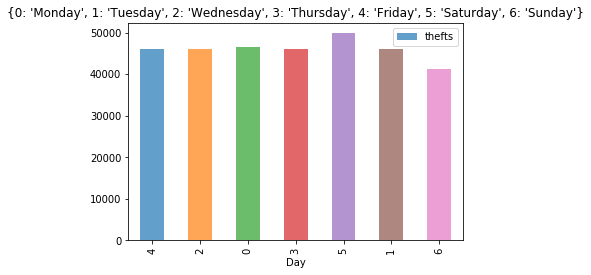

In [125]:
plt.figure(figsize = (16, 17))
theft_in_day.plot(x='Day',y='thefts',kind='bar',alpha=0.7)
#plt.barh(theft_in_day['thefts'],theft_in_day['Day'], color=['red', 'blue', 'purple'],alpha=0.5)
plt.title(dayOfWeek)
plt.show()